In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

import warnings
warnings.filterwarnings("ignore")

In [46]:
ipums2019 = pd.read_csv('usa_00006.csv.gz', compression='gzip')

mxtariff = pd.read_csv('trade_tariff_20.csv')

In [47]:
mxtariff.describe()

,commodity,hs8,hs6,industry_code,total_trade,mexico_trade,change,% change,mfn_ad_val_rate,mfn_specific_rate,mexico_ad_val_rate,mexico_specific_rate,mexico_share_good_j,RCA,RCA_compare
count,9.372000e+03,9.372000e+03,9372.000000,9372.000000,9.151000e+03,8.043000e+03,7.780000e+03,7780.000000,9372.000000,9372.000000,9372.0,9372.0,8028.000000,8028.000000,9372.000000
mean,5.445525e+09,5.445525e+07,544552.312100,314.738263,1.798622e+08,2.628463e+07,-5.816553e+06,143.429268,59.772250,59.758539,0.0,0.0,0.218636,1.702197,0.367584
std,2.851865e+09,2.851865e+07,285186.493548,102.151001,1.705784e+09,2.067637e+08,9.688607e+07,5498.550940,770.723818,770.724883,0.0,0.0,0.536635,4.177994,0.482173
min,1.012100e+08,1.012100e+06,10121.000000,111.000000,2.614000e+03,2.520000e+03,-5.384060e+09,-99.981851,0.000000,0.000000,0.0,0.0,0.000002,0.000013,0.000000
25%,2.920218e+09,2.920218e+07,292021.750000,313.000000,2.544330e+06,2.384750e+05,-1.678082e+06,-40.533766,0.000000,0.000000,0.0,0.0,0.031207,0.242967,0.000000
50%,5.601255e+09,5.601255e+07,560125.500000,325.000000,1.594198e+07,1.715244e+06,-1.438185e+05,-14.388439,0.000000,0.000000,0.0,0.0,0.096958,0.754871,0.000000
75%,8.432128e+09,8.432128e+07,843212.750000,333.000000,7.625914e+07,9.849124e+06,1.211392e+05,17.600852,0.032000,0.000000,0.0,0.0,0.247315,1.925481,1.000000
max,9.880006e+09,9.880006e+07,988000.000000,990.000000,1.260183e+11,8.275513e+09,1.625573e+09,466726.887500,9999.999999,9999.999999,0.0,0.0,19.296520,150.233814,1.000000


In [48]:
mxtariff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9372 entries, 0 to 9371
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   commodity             9372 non-null   int64  
 1   hs8                   9372 non-null   int64  
 2   hs6                   9372 non-null   int64  
 3   naics                 9372 non-null   object 
 4   industry_code         9372 non-null   int64  
 5   total_trade           9151 non-null   float64
 6   mexico_trade          8043 non-null   float64
 7   change                7780 non-null   float64
 8   % change              7780 non-null   float64
 9   mfn_ad_val_rate       9372 non-null   float64
 10  mfn_specific_rate     9372 non-null   float64
 11  mexico_ad_val_rate    9372 non-null   float64
 12  mexico_specific_rate  9372 non-null   float64
 13  begin_effect_date     6863 non-null   object 
 14  mexico_share_good_j   8028 non-null   float64
 15  RCA                  

In [49]:
ipums2019.describe()

,YEAR,SAMPLE,CPUMA0010,SEX,AGE,MARST,RACE,RACED,SPEAKENG,EDUC,EDUCD,EMPSTAT,EMPSTATD,IND,UHRSWORK,INCWAGE
count,5.880607e+06,5.880607e+06,5.880607e+06,5.880607e+06,5.880607e+06,5.880607e+06,5.880607e+06,5.880607e+06,5.880607e+06,5.880607e+06,5.880607e+06,5.880607e+06,5.880607e+06,5.880607e+06,5.880607e+06,5.880607e+06
mean,2.019449e+03,2.019459e+05,5.447239e+02,1.507878e+00,4.231851e+01,3.603436e+00,2.061785e+00,2.089614e+02,3.078444e+00,6.291268e+00,6.534967e+01,1.536702e+00,1.540164e+01,3.793090e+03,1.962994e+01,1.971639e+05
std,4.974038e-01,4.974038e+01,3.311035e+02,4.999380e-01,2.381205e+01,2.308333e+00,2.192392e+00,2.249496e+02,9.439617e-01,3.242922e+00,3.227004e+01,1.128349e+00,1.127140e+01,3.744495e+03,2.121220e+01,3.679980e+05
min,2.019000e+03,2.019010e+05,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+02,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.019000e+03,2.019010e+05,2.540000e+02,1.000000e+00,2.200000e+01,1.000000e+00,1.000000e+00,1.000000e+02,3.000000e+00,5.000000e+00,5.000000e+01,1.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.019000e+03,2.019010e+05,5.380000e+02,2.000000e+00,4.300000e+01,4.000000e+00,1.000000e+00,1.000000e+02,3.000000e+00,6.000000e+00,6.500000e+01,1.000000e+00,1.000000e+01,3.390000e+03,9.000000e+00,2.370000e+04
75%,2.020000e+03,2.020010e+05,8.560000e+02,2.000000e+00,6.200000e+01,6.000000e+00,2.000000e+00,2.000000e+02,3.000000e+00,1.000000e+01,1.010000e+02,3.000000e+00,3.000000e+01,7.860000e+03,4.000000e+01,8.800000e+04
max,2.020000e+03,2.020010e+05,1.078000e+03,2.000000e+00,9.600000e+01,6.000000e+00,9.000000e+00,9.900000e+02,6.000000e+00,1.100000e+01,1.160000e+02,3.000000e+00,3.000000e+01,9.920000e+03,9.900000e+01,9.999990e+05


In [50]:
ipums2019['age2'] = ipums2019['AGE']**2

ipums2019['male'] = ipums2019['SEX'].apply(lambda x: 1 if x == 1 else 0)

ipums2019['married'] = ipums2019['MARST'].apply(lambda x: 1 if x == 2 else 0)

ipums2019['white'] = ipums2019['RACE'].apply(lambda x: 1 if x == 1 else 0)

ipums2019['speakeng'] = ipums2019['SPEAKENG'].apply(lambda x: 0 if x == 1 else 1)

ipums2019['employed'] = ipums2019['EMPSTAT'].apply(lambda x: 1 if x == 1 else 0)

ipums2019['lhs'] = (ipums2019['EDUCD'] < 60).astype(int)
ipums2019['hs'] = ((ipums2019['EDUCD'] == 61) | (ipums2019['EDUCD'] == 62)).astype(int)
ipums2019['scol'] = ((ipums2019['EDUCD'] >= 65) & (ipums2019['EDUCD'] < 100)).astype(int)
ipums2019['col'] = (ipums2019['EDUCD'] > 100).astype(int)

ipums2019['yr'] = ipums2019['YEAR'].apply(lambda x: 1 if x == 2020 else 0)

ipums2019['logwage'] = np.log(ipums2019['INCWAGE'])

ipums2019['wage_w'] = ipums2019['INCWAGE'] / ipums2019['UHRSWORK'] #average weekly wage

border_values = [7, 8, 11, 25, 43, 312, 457, 458, 462, 469, 470, 471]
ipums2019['border'] = ipums2019['CPUMA0010'].isin(border_values).astype(int)
ipums2019['border'] = ipums2019['border'].fillna(0).astype(int)

In [51]:
ipums2019.columns

Index(['YEAR', 'SAMPLE', 'CPUMA0010', 'SEX', 'AGE', 'MARST', 'RACE', 'RACED',
       'SPEAKENG', 'EDUC', 'EDUCD', 'EMPSTAT', 'EMPSTATD', 'IND', 'INDNAICS',
       'UHRSWORK', 'INCWAGE', 'age2', 'male', 'married', 'white', 'speakeng',
       'employed', 'lhs', 'hs', 'scol', 'col', 'yr', 'logwage', 'wage_w',
       'border'],
      dtype='object')

In [52]:
ipums2019.drop(columns=['YEAR', 'SEX', 'MARST', 'RACE', 'RACED', 'EDUC', 'SPEAKENG', 'UHRSWORK', 'EMPSTATD', 'IND', 'EMPSTAT'], inplace=True)
ipums2019.head()


,SAMPLE,CPUMA0010,AGE,EDUCD,INDNAICS,INCWAGE,age2,male,married,white,speakeng,employed,lhs,hs,scol,col,yr,logwage,wage_w,border
0,201901,15,39,40,0,0,1521,1,0,0,1,0,1,0,0,0,0,-inf,NaN,0
1,201901,6,21,40,0,0,441,0,0,1,1,0,1,0,0,0,0,-inf,NaN,0
2,201901,7,19,71,8131,1400,361,1,0,0,1,1,0,0,1,0,0,7.244228,43.75,1
3,201901,7,77,30,0,0,5929,1,0,1,1,0,1,0,0,0,0,-inf,NaN,1
4,201901,18,41,30,0,0,1681,1,0,0,1,0,1,0,0,0,0,-inf,NaN,0


In [53]:
ipums2019['INDNAICS'] = pd.to_numeric(ipums2019['INDNAICS'], errors='coerce')
ipums2019 = ipums2019[ipums2019['INDNAICS'] != 0]
ipums2019.head(15)

,SAMPLE,CPUMA0010,AGE,EDUCD,INDNAICS,INCWAGE,age2,male,married,white,speakeng,employed,lhs,hs,scol,col,yr,logwage,wage_w,border
2,201901,7,19,71,8131.0,1400,361,1,0,0,1,1,0,0,1,0,0,7.244228,43.750000,1
8,201901,15,39,101,814.0,60000,1521,0,0,1,1,0,0,0,0,1,0,11.002100,1500.000000,0
11,201901,2,19,71,4481.0,390,361,1,0,0,1,1,0,0,1,0,0,5.966147,12.580645,0
13,201901,15,39,101,814.0,60000,1521,0,0,1,1,0,0,0,0,1,0,11.002100,1500.000000,0
14,201901,15,21,71,NaN,240,441,1,0,1,1,0,0,0,1,0,0,5.480639,20.000000,0
15,201901,1,45,63,23.0,0,2025,0,0,0,1,0,0,0,0,0,0,-inf,NaN,0
17,201901,15,31,50,337.0,800,961,1,0,0,1,0,1,0,0,0,0,6.684612,20.000000,0
18,201901,16,18,65,NaN,3700,324,0,0,0,1,1,0,0,1,0,0,8.216088,185.000000,0
20,201901,6,32,65,492.0,14400,1024,1,0,1,1,0,0,0,1,0,0,9.574983,205.714286,0
22,201901,15,19,71,NaN,140,361,0,0,1,1,1,0,0,1,0,0,4.941642,46.666667,0


In [54]:
mxtariff.head()

,commodity,hs8,hs6,naics,industry_code,total_trade,mexico_trade,change,% change,mfn_ad_val_rate,mfn_specific_rate,mexico_ad_val_rate,mexico_specific_rate,begin_effect_date,mexico_share_good_j,RCA,RCA_compare
0,101210000,1012100,10121,112920,112,249655042.0,1253771.0,-3333218.0,-72.666797,0.000,0.0,0.0,0.0,2012-02-03,0.005022,0.039099,0
1,101290000,1012900,10129,112920,112,121004651.0,29977648.0,-13202303.0,-30.575076,0.000,0.0,0.0,0.0,2012-02-03,0.247740,1.928787,1
2,101300000,1013000,10130,112920,112,544838.0,300706.0,-73773.0,-19.700170,0.068,0.0,0.0,0.0,2020-07-01,0.551918,4.296981,1
3,101900000,1019000,10190,112920,112,3314205.0,457723.0,208836.0,83.907958,0.000,0.0,0.0,0.0,NaN,0.138109,1.075256,1
4,102210010,1022100,10221,11211X,112,4407473.0,9870909.0,6536565.0,196.037511,0.000,0.0,0.0,0.0,2012-02-03,2.239585,17.436374,1


In [55]:
# Rename the column in mxtariff
mxtariff.rename(columns={'industry_code': 'naics3'}, inplace=True)

Since the data in mxtariff represents Mexico trade data for 2020, and the % change reflects the change in Mexico trade compared to 2019, now use the % change to calculate the vulnerability for 2020 by considering how the trade situation has changed from 2019.

In [56]:
# Step 1: Create industry_code in ipums2019 by stripping the first 3 characters of the 'INDNAICS' column
ipums2019['industry_code'] = ipums2019['INDNAICS'].astype(str).str[:3]

# Step 2: Create industry_code in mxtariff by stripping the first 3 characters of the 'naics' column
mxtariff['industry_code'] = mxtariff['naics'].astype(str).str[:3]

# Check the unique values in both industry_code columns to verify they're consistent
print(ipums2019['industry_code'].unique())
print(mxtariff['industry_code'].unique())

['813' '814' '448' 'nan' '23.' '337' '492' '531' '445' '321' '453' '722'
 '812' '326' '452' '441' '212' '333' '561' '999' '624' '712' '112' '322'
 '311' '621' '424' '113' '111' '811' '484' '512' '325' '447' '611' '541'
 '493' '562' '623' '331' '721' '323' '454' '923' '336' '423' '213' '335'
 '488' '517' '713' '451' '524' '491' '446' '332' '515' '711' '313' '481'
 '482' '339' '442' '519' '443' '485' '221' '314' '425' '55.' '115' '211'
 '486' '921' '444' '324' '622' '532' '327' '334' '312' '483' '511' '518'
 '114' '487' '316']
['112' '311' '114' '990' '339' '111' '113' '910' '325' '313' '312' '212'
 '327' '324' '331' '211' '332' '335' '322' '334' '326' '314' '337' '315'
 '316' '323' '336' '930' '321' '333' '980']


Intially , I tried to calculate the vunerability index. However, directly use the change (tariff change) and RCA (Revealed Comparative Advantage) data to calculate the vulnerability at the industry level (or community level) without needing to merge large datasets is still too heavy for my laptop's storage ability. In order to calculate the tariff shock like the paper mentioned, I went for industry-level exposure to tariff changes and the vulnerabilty of local labor market. 

In [57]:
target_industry = mxtariff['industry_code'].unique()
ipums2019_filtered = ipums2019[ipums2019['industry_code'].isin(target_industry)]

print(ipums2019_filtered[['SAMPLE', 'industry_code']].head())


     SAMPLE industry_code
17   201901           337
43   201901           321
68   201901           321
98   201901           326
108  201901           326


In [58]:
# Reformat the '% change' column to its decimal equivalent (divide by 100)
mxtariff['% change'] = mxtariff['% change'] / 100

In [59]:
# First, calculate the industry-level vulnerability based on tariff changes and RCA
mxtariff['industry_vulnerability'] = mxtariff["% change"] * mxtariff['RCA']

# Check the calculated industry-level vulnerability
print(mxtariff[['industry_code', "% change", 'RCA', 'industry_vulnerability']].head(15))


   industry_code  % change        RCA  industry_vulnerability
0            112 -0.726668   0.039099               -0.028412
1            112 -0.305751   1.928787               -0.589728
2            112 -0.197002   4.296981               -0.846512
3            112  0.839080   1.075256                0.902226
4            112  1.960375  17.436374               34.181834
5            112 -0.721233   0.865139               -0.623967
6            112  0.040556   5.683394                0.230495
7            112 -0.515562   0.454707               -0.234429
8            112  0.785375   1.007361                0.791157
9            112  6.442564   7.267644               46.822261
10           112  0.968921  11.877576               11.508431
11           112  8.727400   5.281561               46.094293
12           112 -0.204314   2.328885               -0.475824
13           112 -0.730958   0.707218               -0.516947
14           112 -0.030593   6.225596               -0.190458


`weighted_vulnerability= (∑RCA_i × vulnerability_i)/(∑(RCA_i))`
​

In [60]:
# Calculate the weighted vulnerability for each industry code
# The weight is based on the RCA for each row
mxtariff['weighted_vulnerability'] = mxtariff['RCA'] * mxtariff['industry_vulnerability']

# Sum of weights (RCA) for each industry_code
industry_weight_sum = mxtariff.groupby('industry_code')['RCA'].sum()

# Sum of weighted vulnerabilities for each industry_code
industry_weighted_vulnerability_sum = mxtariff.groupby('industry_code')['weighted_vulnerability'].sum()

# Calculate the weighted industry vulnerability (sum of weighted vulnerabilities / sum of weights)
industry_weighted_vulnerability = industry_weighted_vulnerability_sum / industry_weight_sum

# Check the result
print(industry_weighted_vulnerability.head())

industry_code
111    1230.928771
112      14.892937
113       0.813199
114       7.298571
211       4.103971
dtype: float64


In [61]:
# Convert the Series to a DataFrame and give it a column name
industry_weighted_vulnerability_df = industry_weighted_vulnerability.reset_index()
industry_weighted_vulnerability_df.columns = ['industry_code', 'weighted_vulnerability']

# Check the result to ensure it's in the correct format
print(industry_weighted_vulnerability_df.head())

  industry_code  weighted_vulnerability
0           111             1230.928771
1           112               14.892937
2           113                0.813199
3           114                7.298571
4           211                4.103971


In [62]:
# Merge the industry-level weighted vulnerability with ipums2019_filtered
ipums2019_filtered = ipums2019_filtered.merge(industry_weighted_vulnerability_df, on='industry_code', how='left', suffixes=('', '_new'))

employed_data = ipums2019_filtered[ipums2019_filtered['employed'] == 1]

employed_data.head()

,SAMPLE,CPUMA0010,AGE,EDUCD,INDNAICS,INCWAGE,age2,male,married,white,...,lhs,hs,scol,col,yr,logwage,wage_w,border,industry_code,weighted_vulnerability
5,201901,7,26,71,2121.0,3200,676,1,0,1,...,0,0,1,0,0,8.070906,152.380952,1,212,52.717124
31,201901,4,34,63,3211.0,2400,1156,1,0,1,...,0,0,0,0,0,7.783224,60.000000,0,321,27.690708
33,201901,2,53,64,3231.0,14000,2809,0,0,1,...,0,0,0,0,0,9.546813,350.000000,0,323,19.770351
37,201901,1,24,63,3211.0,2000,576,1,0,1,...,0,0,0,0,0,7.600902,50.000000,0,321,27.690708
43,201901,7,26,71,2121.0,3200,676,1,0,1,...,0,0,1,0,0,8.070906,152.380952,1,212,52.717124


In [63]:
# Filter for employed individuals
employed_data = ipums2019_filtered[ipums2019_filtered['employed'] == 1]

# Check the result to ensure the filtering is correct
print(employed_data[['SAMPLE', 'industry_code', 'weighted_vulnerability']].head(15))

    SAMPLE industry_code  weighted_vulnerability
5   201901           212               52.717124
31  201901           321               27.690708
33  201901           323               19.770351
37  201901           321               27.690708
43  201901           212               52.717124
50  201901           321               27.690708
56  201901           212               52.717124
57  201901           321               27.690708
65  201901           321               27.690708
67  201901           311               29.389714
68  201901           321               27.690708
81  201901           111             1230.928771
83  201901           321               27.690708
88  201901           113                0.813199
89  201901           322                7.203151


In [64]:
# Assign the weighted vulnerability to the employed individuals
employed_data['vulnerability'] = employed_data['weighted_vulnerability']

### Regression

#### Impact of Industry-level Vulnerability on Individual-level Outcomes

In [65]:
employed_data.head()

,SAMPLE,CPUMA0010,AGE,EDUCD,INDNAICS,INCWAGE,age2,male,married,white,...,hs,scol,col,yr,logwage,wage_w,border,industry_code,weighted_vulnerability,vulnerability
5,201901,7,26,71,2121.0,3200,676,1,0,1,...,0,1,0,0,8.070906,152.380952,1,212,52.717124,52.717124
31,201901,4,34,63,3211.0,2400,1156,1,0,1,...,0,0,0,0,7.783224,60.000000,0,321,27.690708,27.690708
33,201901,2,53,64,3231.0,14000,2809,0,0,1,...,0,0,0,0,9.546813,350.000000,0,323,19.770351,19.770351
37,201901,1,24,63,3211.0,2000,576,1,0,1,...,0,0,0,0,7.600902,50.000000,0,321,27.690708,27.690708
43,201901,7,26,71,2121.0,3200,676,1,0,1,...,0,1,0,0,8.070906,152.380952,1,212,52.717124,52.717124


In [66]:
ipums2019.rename(columns={'SAMPLE': 'sample', 'AGE': 'age', 'INDNAICS': 'indnaics', 'INCWAGE': 'income'}, inplace=True)


In [67]:
employed_data.columns

Index(['SAMPLE', 'CPUMA0010', 'AGE', 'EDUCD', 'INDNAICS', 'INCWAGE', 'age2',
       'male', 'married', 'white', 'speakeng', 'employed', 'lhs', 'hs', 'scol',
       'col', 'yr', 'logwage', 'wage_w', 'border', 'industry_code',
       'weighted_vulnerability', 'vulnerability'],
      dtype='object')

In [68]:
# Group by industry code and calculate the mean vulnerability for each industry
industry_vulnerability = employed_data.groupby('industry_code')['vulnerability'].mean()

# Sort the industries by vulnerability in descending order to get the most vulnerable industries
most_vulnerable = industry_vulnerability.sort_values(ascending=False).head(10)

# Sort the industries by vulnerability in ascending order to get the least vulnerable industries
least_vulnerable = industry_vulnerability.sort_values(ascending=True).head(10)

# Display the most and least vulnerable industries
print("Most Vulnerable Industries:")
print(most_vulnerable)

print("\nLeast Vulnerable Industries:")
print(least_vulnerable)

Most Vulnerable Industries:
industry_code
335    7508.167330
336    3329.981865
111    1230.928771
324     765.670935
316     755.742109
325      78.551886
313      55.133208
212      52.717124
331      38.885420
311      29.389714
Name: vulnerability, dtype: float64

Least Vulnerable Industries:
industry_code
113    0.813199
332    0.958024
337    1.090910
339    1.640722
326    2.739617
312    3.533016
211    4.103971
314    4.423002
327    6.886383
322    7.203151
Name: vulnerability, dtype: float64


In [69]:
naics_mapping = pd.read_excel("2-6 digit_2017_Codes.xlsx")
naics_mapping.columns = naics_mapping.columns.str.strip()  # strip any extra spaces
naics_mapping['industry_code'] = naics_mapping['2017 NAICS US   Code'].astype(str).str.strip()

naics_mapping_3digit = naics_mapping[naics_mapping['industry_code'].str.len() == 3]

# Extract industry descriptions for the most and least vulnerable industries
most_vulnerable_filtered = most_vulnerable[most_vulnerable.index != '111']
least_vulnerable_filtered = least_vulnerable[least_vulnerable.index != '111']

most_vulnerable_descriptions = naics_mapping_3digit[naics_mapping_3digit['industry_code'].isin(most_vulnerable_filtered.index)]
least_vulnerable_descriptions = naics_mapping_3digit[naics_mapping_3digit['industry_code'].isin(least_vulnerable_filtered.index)]

# Display the results
print("Most Vulnerable Industries:")
print(most_vulnerable_descriptions[['industry_code', '2017 NAICS US Title']])

print("\nLeast Vulnerable Industries:")
print(least_vulnerable_descriptions[['industry_code', '2017 NAICS US Title']])

Most Vulnerable Industries:
    industry_code                                2017 NAICS US Title
139           212                        Mining (except Oil and Gas)
279           311                                 Food Manufacturing
368           313                                      Textile Mills
416           316           Leather and Allied Product Manufacturing
479           324          Petroleum and Coal Products Manufacturing
489           325                             Chemical Manufacturing
607           331                        Primary Metal Manufacturing
797           335  Electrical Equipment, Appliance, and Component...
829           336             Transportation Equipment Manufacturing

Least Vulnerable Industries:
    industry_code                          2017 NAICS US Title
98            113                         Forestry and Logging
133           211                       Oil and Gas Extraction
353           312   Beverage and Tobacco Product Manufacturing


In [70]:
employed_data['logwage'] = employed_data['logwage'].replace([float('inf'), -float('inf')], float('nan'))

employed_data = employed_data.dropna(subset=['logwage'])

In [71]:
# Check if there are unusually large values in logwage
print(employed_data['logwage'].describe())

count    159602.000000
mean         10.671436
std           0.962492
min           1.386294
25%          10.261162
50%          10.736397
75%          11.225243
max          13.518451
Name: logwage, dtype: float64


In [72]:
# Interaction terms
# With vulnerability
employed_data['age2_vul'] = employed_data['age2'] * employed_data['vulnerability']
employed_data['male_vul'] = employed_data['male'] * employed_data['vulnerability']
employed_data['married_vul'] = employed_data['married'] * employed_data['vulnerability']
employed_data['white_vul'] = employed_data['white'] * employed_data['vulnerability']
employed_data['speakeng_vul'] = employed_data['speakeng'] * employed_data['vulnerability']
employed_data['lhs_vul'] = employed_data['lhs'] * employed_data['vulnerability']
employed_data['hs_vul'] = employed_data['hs'] * employed_data['vulnerability']
employed_data['scol_vul'] = employed_data['scol'] * employed_data['vulnerability']
employed_data['col_vul'] = employed_data['col'] * employed_data['vulnerability']

# Vulnerability * year
employed_data['age2_vul_yr'] = employed_data['age2_vul'] * employed_data['yr']
employed_data['male_vul_yr'] = employed_data['male_vul'] * employed_data['yr']
employed_data['married_vul_yr'] = employed_data['married_vul'] * employed_data['yr']
employed_data['white_vul_yr'] = employed_data['white_vul'] * employed_data['yr']
employed_data['speakeng_vul_yr'] = employed_data['speakeng_vul'] * employed_data['yr']
employed_data['lhs_vul_yr'] = employed_data['lhs_vul'] * employed_data['yr']
employed_data['hs_vul_yr'] = employed_data['hs_vul'] * employed_data['yr']
employed_data['scol_vul_yr'] = employed_data['scol_vul'] * employed_data['yr']
employed_data['col_vul_yr'] = employed_data['col_vul'] * employed_data['yr']

# Without vulnerability * year
employed_data['age2_yr'] = employed_data['age2'] * employed_data['yr']
employed_data['male_yr'] = employed_data['male'] * employed_data['yr']
employed_data['married_yr'] = employed_data['married'] * employed_data['yr']
employed_data['white_yr'] = employed_data['white'] * employed_data['yr']
employed_data['speakeng_yr'] = employed_data['speakeng'] * employed_data['yr']
employed_data['lhs_yr'] = employed_data['lhs'] * employed_data['yr']
employed_data['hs_yr'] = employed_data['hs'] * employed_data['yr']
employed_data['scol_yr'] = employed_data['scol'] * employed_data['yr']
employed_data['col_yr'] = employed_data['col'] * employed_data['yr']


### With or Without Vulnerability Measurement 

In [73]:
# Merge the most and least vulnerable industries with their descriptions
most_vulnerable_merged = most_vulnerable_filtered.reset_index().merge(naics_mapping_3digit, on='industry_code')
least_vulnerable_merged = least_vulnerable_filtered.reset_index().merge(naics_mapping_3digit, on='industry_code')


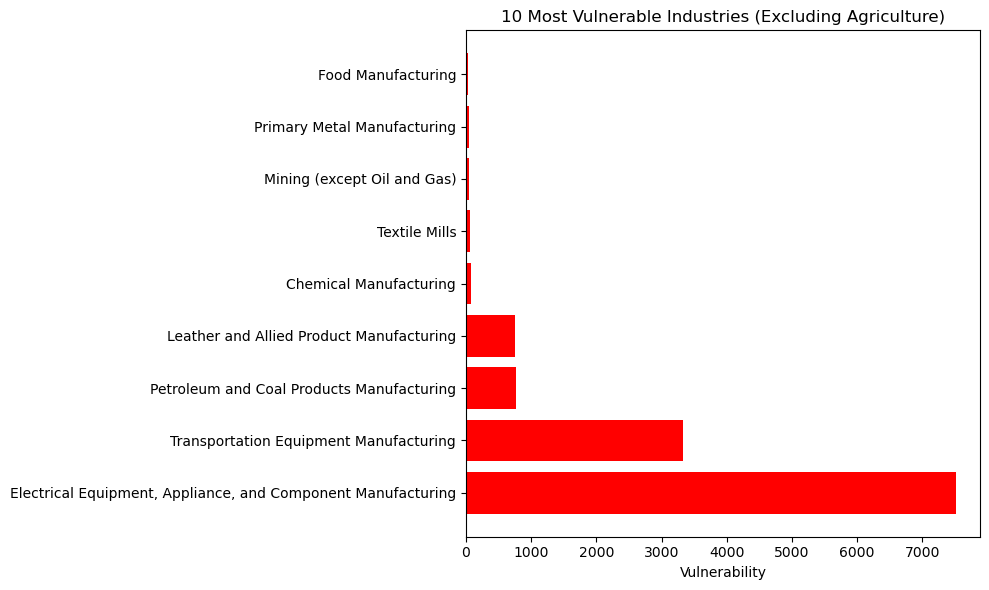

<Figure size 640x480 with 0 Axes>

In [74]:
# Plot the most vulnerable industries
plt.figure(figsize=(10, 6))
plt.barh(most_vulnerable_merged['2017 NAICS US Title'], most_vulnerable_merged['vulnerability'], color='red')
plt.xlabel('Vulnerability')
plt.title('10 Most Vulnerable Industries (Excluding Agriculture)')
plt.tight_layout()
plt.show()
plt.savefig('most_vulnerable_industries.png')

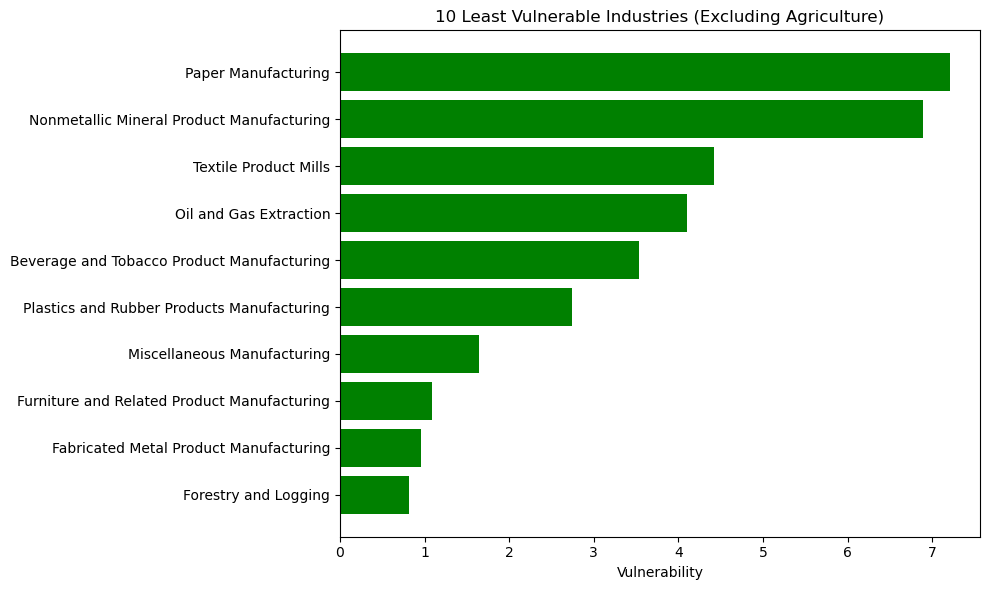

<Figure size 640x480 with 0 Axes>

In [75]:
# Plot the least vulnerable industries
plt.figure(figsize=(10, 6))
plt.barh(least_vulnerable_merged['2017 NAICS US Title'], least_vulnerable_merged['vulnerability'], color='green')
plt.xlabel('Vulnerability')
plt.title('10 Least Vulnerable Industries (Excluding Agriculture)')
plt.tight_layout()
plt.show()
plt.savefig('least_vulnerable_industries.png')


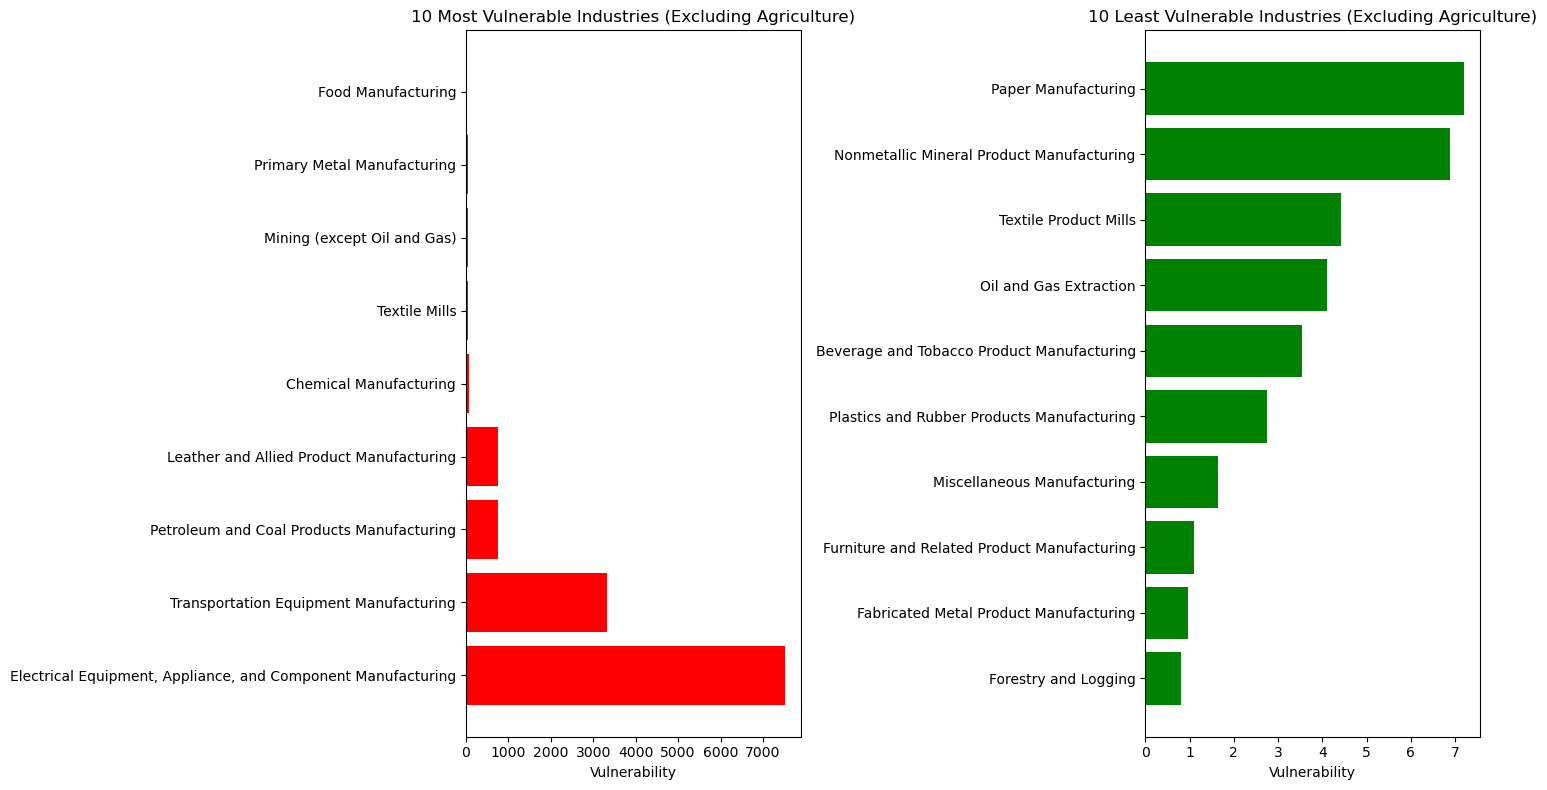

In [76]:
# Create a 1x2 subplot
fig, axs = plt.subplots(1, 2, figsize=(15, 8))

# Plot the most vulnerable industries
axs[0].barh(most_vulnerable_merged['2017 NAICS US Title'], most_vulnerable_merged['vulnerability'], color='red')
axs[0].set_xlabel('Vulnerability')
axs[0].set_title('10 Most Vulnerable Industries (Excluding Agriculture)')

# Plot the least vulnerable industries
axs[1].barh(least_vulnerable_merged['2017 NAICS US Title'], least_vulnerable_merged['vulnerability'], color='green')
axs[1].set_xlabel('Vulnerability')
axs[1].set_title('10 Least Vulnerable Industries (Excluding Agriculture)')

# Adjust layout
plt.tight_layout()
plt.show()

# Save the figure
fig.savefig('vulnerability_comparison.png')

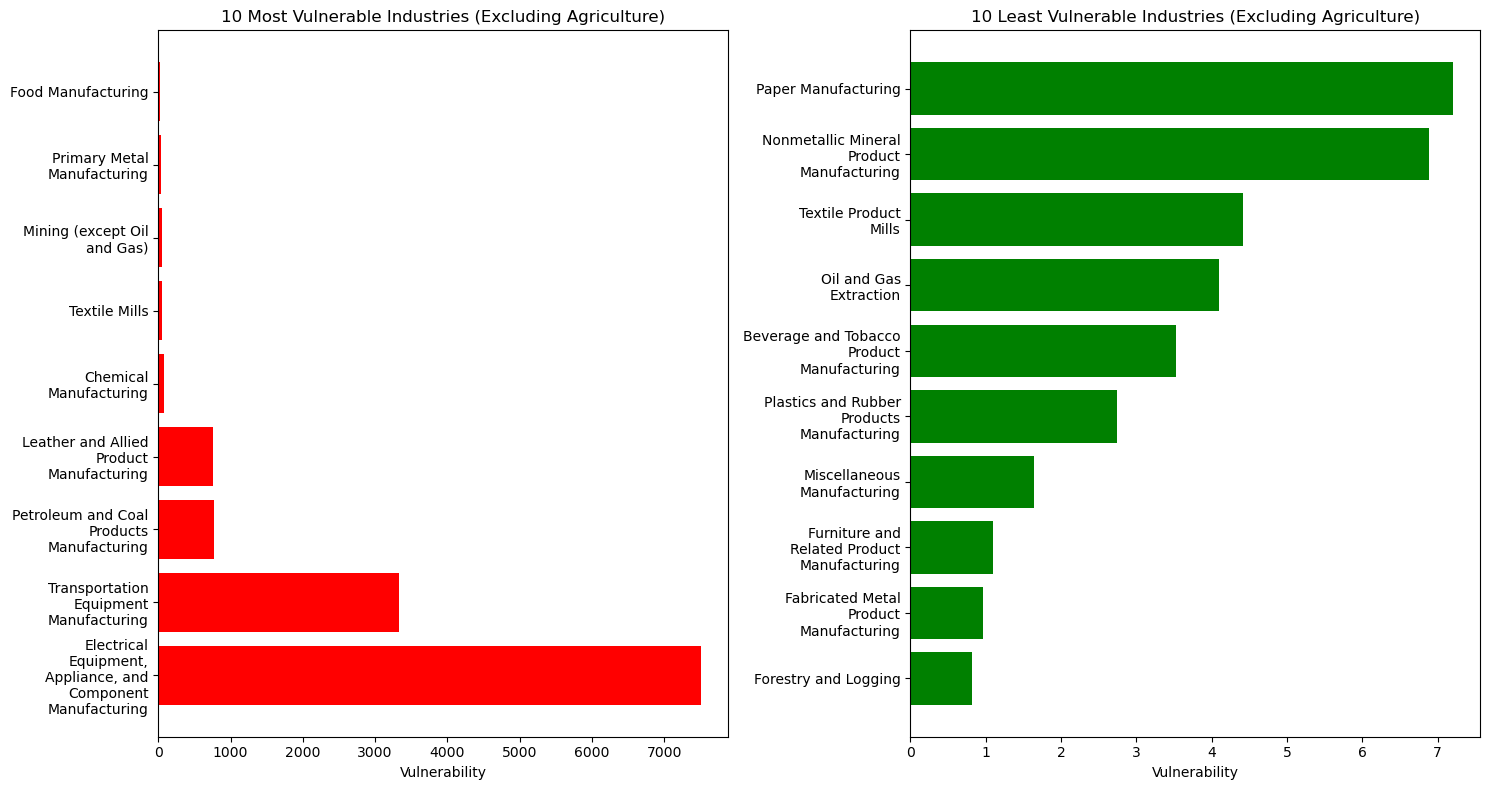

In [77]:
import textwrap

# Function to wrap text
def wrap_labels(ax, width, break_long_words=False):
    labels = [textwrap.fill(label.get_text(), width, break_long_words=break_long_words) for label in ax.get_yticklabels()]
    ax.set_yticklabels(labels, rotation=0)

# Create a 1x2 subplot
fig, axs = plt.subplots(1, 2, figsize=(15, 8))

# Plot the most vulnerable industries
axs[0].barh(most_vulnerable_merged['2017 NAICS US Title'], most_vulnerable_merged['vulnerability'], color='red')
axs[0].set_xlabel('Vulnerability')
axs[0].set_title('10 Most Vulnerable Industries (Excluding Agriculture)')
wrap_labels(axs[0], 20)  # Adjust the width as needed

# Plot the least vulnerable industries
axs[1].barh(least_vulnerable_merged['2017 NAICS US Title'], least_vulnerable_merged['vulnerability'], color='green')
axs[1].set_xlabel('Vulnerability')
axs[1].set_title('10 Least Vulnerable Industries (Excluding Agriculture)')
wrap_labels(axs[1], 20)  # Adjust the width as needed

# Adjust layout
plt.tight_layout()
plt.show()

# Save the figure
fig.savefig('vulnerability_comparison_wrapped.png')

In [78]:
# Filter the data for the top 10 most impacted industries
top_10_industries = ['335', '336', '324', '316', '325', '313', '212', '331', '311']

data_top_10 = employed_data[employed_data['industry_code'].isin(top_10_industries)]

independent_vars_with_vul_yr = ['age2_vul_yr', 'male_vul_yr', 'white_vul_yr', 'married_vul_yr', 'speakeng_vul_yr', 'lhs_vul_yr', 'hs_vul_yr', 'scol_vul_yr', 'col_vul_yr']
independent_vars_without_vul_yr = ['age2_yr', 'male_yr', 'white_yr', 'married_yr', 'speakeng_yr', 'lhs_yr', 'hs_yr', 'scol_yr', 'col_yr']

# Define the independent variables (X) and dependent variable (y)
X_top_10 = sm.add_constant(data_top_10[independent_vars_with_vul_yr])
y_top_10 = data_top_10['logwage']

model_top_10_robust = sm.OLS(y_top_10, X_top_10).fit(cov_type='HC3')
model_top_10_robust.summary()

# Calculate weights
weights_top_10 = 1 / model_top_10_robust.resid**2

# WLS model
model_top_10_wls = sm.WLS(y_top_10, X_top_10, weights=weights_top_10).fit()

print("Top 10 Most Impacted Industries (Weighted):")
print(model_top_10_wls.summary())


Top 10 Most Impacted Industries (Weighted):
                            WLS Regression Results                            
Dep. Variable:                logwage   R-squared:                       0.988
Model:                            WLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                 4.579e+05
Date:                Wed, 11 Dec 2024   Prob (F-statistic):               0.00
Time:                        10:52:38   Log-Likelihood:                -28098.
No. Observations:               51141   AIC:                         5.622e+04
Df Residuals:                   51131   BIC:                         5.630e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------

In [79]:
# Define the independent variables (X) and dependent variable (y)
X_top_10_w = sm.add_constant(data_top_10[independent_vars_without_vul_yr])
y_top_10_w = data_top_10['logwage']

model_top_10_w_robust = sm.OLS(y_top_10_w, X_top_10_w).fit(cov_type='HC3')
model_top_10_w_robust.summary()

# Calculate weights
weights_top_10_w = 1 / model_top_10_w_robust.resid**2

# WLS model
model_top_10_w_wls = sm.WLS(y_top_10_w, X_top_10_w, weights=weights_top_10_w).fit()

print("Top 10 Most Impacted Industries (Weighted without Vulnerabilty):")
print(model_top_10_w_wls.summary())

Top 10 Most Impacted Industries (Weighted without Vulnerabilty):
                            WLS Regression Results                            
Dep. Variable:                logwage   R-squared:                       0.999
Model:                            WLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 6.152e+06
Date:                Wed, 11 Dec 2024   Prob (F-statistic):               0.00
Time:                        10:52:38   Log-Likelihood:                -23558.
No. Observations:               51141   AIC:                         4.714e+04
Df Residuals:                   51131   BIC:                         4.722e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------

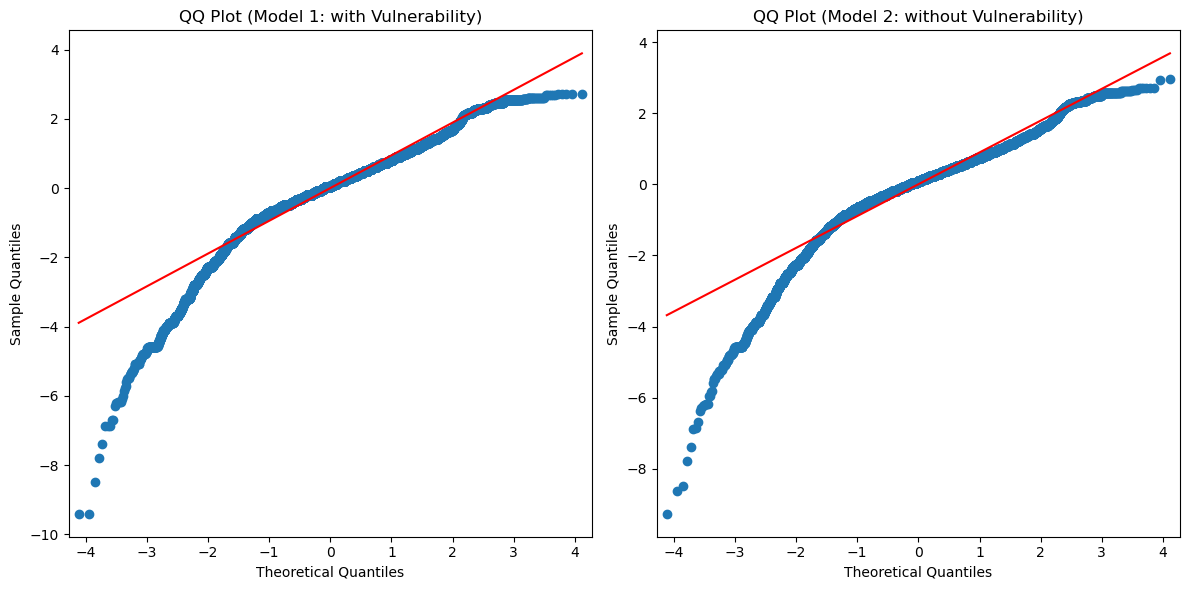

In [80]:
# Extract residuals from the models
residuals_model1 = model_top_10_wls.resid
residuals_model2 = model_top_10_w_wls.resid

# Create a 1x2 subplot
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot QQ plot for model 1
sm.qqplot(residuals_model1, line='s', ax=axs[0])
axs[0].set_title('QQ Plot (Model 1: with Vulnerability)')

# Plot QQ plot for model 2
sm.qqplot(residuals_model2, line='s', ax=axs[1])
axs[1].set_title('QQ Plot (Model 2: without Vulnerability)')

# Adjust layout
plt.tight_layout()
plt.show()

#save as png
fig.savefig("qq_plots_weighted.png")

In [81]:
bp_test1 = het_breuschpagan(model_top_10_w_wls.resid, model_top_10_w_wls.model.exog)
bp_test2 = het_breuschpagan(model_top_10_wls.resid, model_top_10_wls.model.exog)

print(f"Breusch-Pagan test for Weighted Model Top 10 Industry without Vulnerability Measurement: {bp_test1[1]}")
print(f"Breusch-Pagan test for Weighted Model Top 10 Industry with Vulnerability Measurement: {bp_test2[1]}")

Breusch-Pagan test for Weighted Model Top 10 Industry without Vulnerability Measurement: 8.011058737289052e-45
Breusch-Pagan test for Weighted Model Top 10 Industry with Vulnerability Measurement: 5.296589465513211e-12


In [82]:
# Filter the data for the top 10 least impacted industries
least_10_industries = ['113', '332', '337', '339', '326', '312', '211', '314', '327', '322']

data_least_10 = employed_data[employed_data['industry_code'].isin(least_10_industries)]

independent_vars_with_vul_yr = ['age2_vul_yr', 'male_vul_yr', 'white_vul_yr', 'married_vul_yr', 'speakeng_vul_yr', 'lhs_vul_yr', 'hs_vul_yr', 'scol_vul_yr', 'col_vul_yr']
independent_vars_without_vul_yr = ['age2_yr', 'male_yr', 'white_yr', 'married_yr', 'speakeng_yr', 'lhs_yr', 'hs_yr', 'scol_yr', 'col_yr']

# Define the independent variables (X) and dependent variable (y)
X_least_10 = sm.add_constant(data_least_10[independent_vars_with_vul_yr])
y_least_10 = data_least_10['logwage']

model_least_10_robust = sm.OLS(y_least_10, X_least_10).fit(cov_type='HC3')
model_least_10_robust.summary()

# Calculate weights
weights_least_10 = 1 / model_least_10_robust.resid**2

# WLS model
model_least_10_wls = sm.WLS(y_least_10, X_least_10, weights=weights_least_10).fit()

print("Top 10 Least Impacted Industries (Weighted):")
print(model_least_10_wls.summary())

Top 10 Least Impacted Industries (Weighted):
                            WLS Regression Results                            
Dep. Variable:                logwage   R-squared:                       0.999
Model:                            WLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 5.771e+06
Date:                Wed, 11 Dec 2024   Prob (F-statistic):               0.00
Time:                        10:52:40   Log-Likelihood:                -22079.
No. Observations:               57104   AIC:                         4.418e+04
Df Residuals:                   57094   BIC:                         4.427e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------

In [83]:
# Define the independent variables (X) and dependent variable (y)
X_least_10_w = sm.add_constant(data_least_10[independent_vars_without_vul_yr])
y_least_10_w = data_least_10['logwage']

model_least_10_robust_w = sm.OLS(y_least_10_w, X_least_10_w).fit(cov_type='HC3')
model_least_10_robust_w.summary()

# Calculate weights
weights_least_10_w = 1 / model_least_10_robust_w.resid**2

# WLS model
model_least_10_wls_w = sm.WLS(y_least_10_w, X_least_10_w, weights=weights_least_10_w).fit()

print("Top 10 Least Impacted Industries (Weighted):")
print(model_least_10_wls_w.summary())

Top 10 Least Impacted Industries (Weighted):
                            WLS Regression Results                            
Dep. Variable:                logwage   R-squared:                       1.000
Model:                            WLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.289e+07
Date:                Wed, 11 Dec 2024   Prob (F-statistic):               0.00
Time:                        10:52:40   Log-Likelihood:                -20824.
No. Observations:               57104   AIC:                         4.167e+04
Df Residuals:                   57094   BIC:                         4.176e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const

### Main

In [84]:
employed_data['most_impact'] = employed_data['industry_code'].apply(lambda x: 1 if x in top_10_industries else 0)

In [85]:
non_agriculture_data = employed_data[employed_data['industry_code'] != '111']

In [86]:
# Vulnerability * year
employed_data['age2_vul_yr_id'] = employed_data['age2_vul_yr'] * employed_data['most_impact']
employed_data['male_vul_yr_id'] = employed_data['male_vul_yr'] * employed_data['most_impact']
employed_data['married_vul_yr_id'] = employed_data['married_vul_yr'] * employed_data['most_impact']
employed_data['white_vul_yr_id'] = employed_data['white_vul_yr'] * employed_data['most_impact']
employed_data['speakeng_vul_yr_id'] = employed_data['speakeng_vul_yr'] * employed_data['most_impact']
employed_data['lhs_vul_yr_id'] = employed_data['lhs_vul_yr'] * employed_data['most_impact']
employed_data['hs_vul_yr_id'] = employed_data['hs_vul_yr'] * employed_data['most_impact']
employed_data['scol_vul_yr_id'] = employed_data['scol_vul_yr'] * employed_data['most_impact']
employed_data['col_vul_yr_id'] = employed_data['col_vul_yr'] * employed_data['most_impact']

# Without vulnerability * year
employed_data['age2_yr_id'] = employed_data['age2_yr'] * employed_data['most_impact']
employed_data['male_yr_id'] = employed_data['male_yr'] * employed_data['most_impact']
employed_data['married_yr_id'] = employed_data['married_yr'] * employed_data['most_impact']
employed_data['white_yr_id'] = employed_data['white_yr'] * employed_data['most_impact']
employed_data['speakeng_yr_id'] = employed_data['speakeng_yr'] * employed_data['most_impact']
employed_data['lhs_yr_id'] = employed_data['lhs_yr'] * employed_data['most_impact']
employed_data['hs_yr_id'] = employed_data['hs_yr'] * employed_data['most_impact']
employed_data['scol_yr_id'] = employed_data['scol_yr'] * employed_data['most_impact']
employed_data['col_yr_id'] = employed_data['col_yr'] * employed_data['most_impact']

In [87]:
employed_data.columns

Index(['SAMPLE', 'CPUMA0010', 'AGE', 'EDUCD', 'INDNAICS', 'INCWAGE', 'age2',
       'male', 'married', 'white', 'speakeng', 'employed', 'lhs', 'hs', 'scol',
       'col', 'yr', 'logwage', 'wage_w', 'border', 'industry_code',
       'weighted_vulnerability', 'vulnerability', 'age2_vul', 'male_vul',
       'married_vul', 'white_vul', 'speakeng_vul', 'lhs_vul', 'hs_vul',
       'scol_vul', 'col_vul', 'age2_vul_yr', 'male_vul_yr', 'married_vul_yr',
       'white_vul_yr', 'speakeng_vul_yr', 'lhs_vul_yr', 'hs_vul_yr',
       'scol_vul_yr', 'col_vul_yr', 'age2_yr', 'male_yr', 'married_yr',
       'white_yr', 'speakeng_yr', 'lhs_yr', 'hs_yr', 'scol_yr', 'col_yr',
       'most_impact', 'age2_vul_yr_id', 'male_vul_yr_id', 'married_vul_yr_id',
       'white_vul_yr_id', 'speakeng_vul_yr_id', 'lhs_vul_yr_id',
       'hs_vul_yr_id', 'scol_vul_yr_id', 'col_vul_yr_id', 'age2_yr_id',
       'male_yr_id', 'married_yr_id', 'white_yr_id', 'speakeng_yr_id',
       'lhs_yr_id', 'hs_yr_id', 'scol_yr_id', 'co

#### With Agriculture

##### Base Model

In [88]:
# Declare the variable lists
independent_vars_base = ['age2_yr', 'male_yr', 'white_yr', 'married_yr', 'speakeng_yr', 'lhs_yr', 'hs_yr', 'scol_yr', 'col_yr']

# Define the independent variables (X) and dependent variable (y) for the model with vulnerability and industry impact
X_base = sm.add_constant(employed_data[independent_vars_base])
y = employed_data['logwage']

# Fit the model with robust standard errors
base_robust = sm.OLS(y, X_base).fit(cov_type='HC3')

# Calculate weights
weights_base = 1 / base_robust.resid**2

# WLS model with vulnerability and industry impact
base_wls = sm.WLS(y, X_base, weights=weights_base).fit()

print("WLS Regression Base Model (With Agriculture):")
print(base_wls.summary())



WLS Regression Base Model (With Agriculture):
                            WLS Regression Results                            
Dep. Variable:                logwage   R-squared:                       1.000
Model:                            WLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.083e+08
Date:                Wed, 11 Dec 2024   Prob (F-statistic):               0.00
Time:                        10:52:40   Log-Likelihood:                -77252.
No. Observations:              159602   AIC:                         1.545e+05
Df Residuals:                  159592   BIC:                         1.546e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
cons

##### With Vul and Impact

In [89]:
# Declare the variable lists
independent_vars_with_vul_impact = ['age2_vul_yr_id', 'male_vul_yr_id', 'married_vul_yr_id', 'white_vul_yr_id', 'speakeng_vul_yr_id', 'lhs_vul_yr_id', 'hs_vul_yr_id', 'scol_vul_yr_id', 'col_vul_yr_id']
independent_vars_without_vul_impact = ['age2_yr_id', 'male_yr_id', 'married_yr_id', 'white_yr_id', 'speakeng_yr_id', 'lhs_yr_id', 'hs_yr_id', 'scol_yr_id', 'col_yr_id']

In [90]:
# Define the independent variables (X) and dependent variable (y) for the model with vulnerability and industry impact
X_with_vul_impact = sm.add_constant(employed_data[independent_vars_with_vul_impact])
y = employed_data['logwage']

# Fit the model with robust standard errors
model_with_vul_impact_robust = sm.OLS(y, X_with_vul_impact).fit(cov_type='HC3')

# Calculate weights
weights_with_vul_impact = 1 / model_with_vul_impact_robust.resid**2

# WLS model with vulnerability and industry impact
model_with_vul_impact_wls = sm.WLS(y, X_with_vul_impact, weights=weights_with_vul_impact).fit()

print("WLS Regression Model with Vulnerability and Industry Impact:")
print(model_with_vul_impact_wls.summary())



WLS Regression Model with Vulnerability and Industry Impact:
                            WLS Regression Results                            
Dep. Variable:                logwage   R-squared:                       0.965
Model:                            WLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                 4.873e+05
Date:                Wed, 11 Dec 2024   Prob (F-statistic):               0.00
Time:                        10:52:41   Log-Likelihood:                -86639.
No. Observations:              159602   AIC:                         1.733e+05
Df Residuals:                  159592   BIC:                         1.734e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

##### Without Vul

In [91]:
# Define the independent variables (X) for the model without vulnerability but with industry impact
X_without_vul_impact = sm.add_constant(employed_data[independent_vars_without_vul_impact])

# Fit the model with robust standard errors
model_without_vul_impact_robust = sm.OLS(y, X_without_vul_impact).fit(cov_type='HC3')

# Calculate weights
weights_without_vul_impact = 1 / model_without_vul_impact_robust.resid**2

# WLS model without vulnerability but with industry impact
model_without_vul_impact_wls = sm.WLS(y, X_without_vul_impact, weights=weights_without_vul_impact).fit()

print("\nWLS Regression Model without Vulnerability but with Industry Impact:")
print(model_without_vul_impact_wls.summary())


WLS Regression Model without Vulnerability but with Industry Impact:
                            WLS Regression Results                            
Dep. Variable:                logwage   R-squared:                       0.998
Model:                            WLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 7.223e+06
Date:                Wed, 11 Dec 2024   Prob (F-statistic):               0.00
Time:                        10:52:41   Log-Likelihood:                -79489.
No. Observations:              159602   AIC:                         1.590e+05
Df Residuals:                  159592   BIC:                         1.591e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------

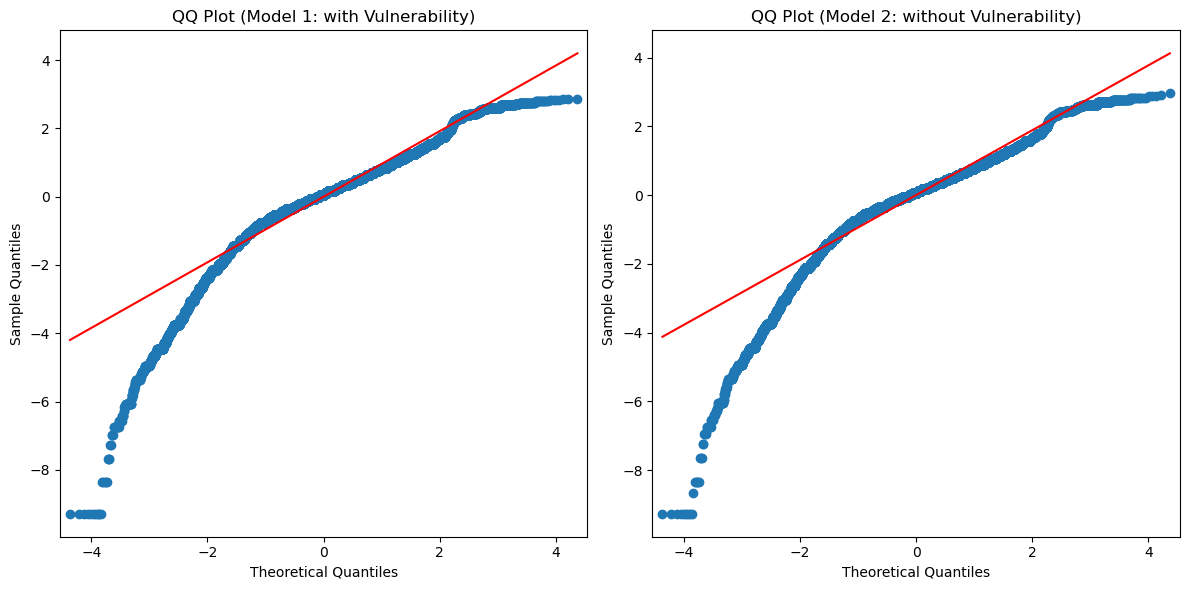

In [92]:
# Extract residuals from the models
residuals_model1 = model_with_vul_impact_wls.resid
residuals_model2 = model_without_vul_impact_wls.resid

# Create a 1x2 subplot
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot QQ plot for model 1
sm.qqplot(residuals_model1, line='s', ax=axs[0])
axs[0].set_title('QQ Plot (Model 1: with Vulnerability)')

# Plot QQ plot for model 2
sm.qqplot(residuals_model2, line='s', ax=axs[1])
axs[1].set_title('QQ Plot (Model 2: without Vulnerability)')

# Adjust layout
plt.tight_layout()
plt.show()

#save as png
fig.savefig("qq_plots_weighted.png")

In [93]:
# Interaction terms with border and year
employed_data['border_yr'] = employed_data['border'] * employed_data['yr']
employed_data['age2_border_yr'] = employed_data['age2'] * employed_data['border_yr']
employed_data['male_border_yr'] = employed_data['male'] * employed_data['border_yr']
employed_data['married_border_yr'] = employed_data['married'] * employed_data['border_yr']
employed_data['white_border_yr'] = employed_data['white'] * employed_data['border_yr']
employed_data['speakeng_border_yr'] = employed_data['speakeng'] * employed_data['border_yr']
employed_data['lhs_border_yr'] = employed_data['lhs'] * employed_data['border_yr']
employed_data['hs_border_yr'] = employed_data['hs'] * employed_data['border_yr']
employed_data['scol_border_yr'] = employed_data['scol'] * employed_data['border_yr']
employed_data['col_border_yr'] = employed_data['col'] * employed_data['border_yr']

In [94]:
independent_vars_border = ['age2_border_yr', 'male_border_yr', 'married_border_yr', 'white_border_yr', 'speakeng_border_yr', 'lhs_border_yr', 'hs_border_yr', 'scol_border_yr', 'col_border_yr']
# Define the independent variables (X) and dependent variable (y) for the base model
X_border= sm.add_constant(employed_data[independent_vars_border])
y = employed_data['logwage']

# Fit the base model with robust standard errors
border_robust = sm.OLS(y, X_border).fit(cov_type='HC3')

# Calculate weights
weights_border = 1 / border_robust.resid**2

# WLS model for the border model
border_wls = sm.WLS(y, X_border, weights=weights_border).fit()

print("WLS Regression Model with Border Effect:")
print(border_wls.summary())

WLS Regression Model with Border Effect:
                            WLS Regression Results                            
Dep. Variable:                logwage   R-squared:                       0.652
Model:                            WLS   Adj. R-squared:                  0.652
Method:                 Least Squares   F-statistic:                 3.324e+04
Date:                Wed, 11 Dec 2024   Prob (F-statistic):               0.00
Time:                        10:52:43   Log-Likelihood:                -85067.
No. Observations:              159602   AIC:                         1.702e+05
Df Residuals:                  159592   BIC:                         1.703e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------

#### Non-Agriculture

In [96]:
# Ensure non_agriculture_data is defined
non_agriculture_data = employed_data[employed_data['industry_code'] != '111']

# Ensure independent_vars_with_vul_impact is defined
independent_vars_with_vul_impact = ['age2_vul_yr_id', 'male_vul_yr_id', 'married_vul_yr_id', 'white_vul_yr_id', 'speakeng_vul_yr_id', 'lhs_vul_yr_id', 'hs_vul_yr_id', 'scol_vul_yr_id', 'col_vul_yr_id']
independent_vars_without_vul_impact = ['age2_yr_id', 'male_yr_id', 'married_yr_id', 'white_yr_id', 'speakeng_yr_id', 'lhs_yr_id', 'hs_yr_id', 'scol_yr_id', 'col_yr_id']

# Define the independent variables (X) and dependent variable (y) for the base model
X_base_non_agri = sm.add_constant(non_agriculture_data[independent_vars_base])
y_non_agri = non_agriculture_data['logwage']

# Fit the base model with robust standard errors
base_robust_non_agri = sm.OLS(y_non_agri, X_base_non_agri).fit(cov_type='HC3')

# Calculate weights
weights_base_non_agri = 1 / base_robust_non_agri.resid**2

# WLS model for the base model
base_wls_non_agri = sm.WLS(y_non_agri, X_base_non_agri, weights=weights_base_non_agri).fit()

print("WLS Regression Base Model (Non-Agriculture):")
print(base_wls_non_agri.summary())

# Define the independent variables (X) for the model with vulnerability and industry impact
X_with_vul_impact_non_agri = sm.add_constant(non_agriculture_data[independent_vars_with_vul_impact])

# Fit the model with robust standard errors
model_with_vul_impact_robust_non_agri = sm.OLS(y_non_agri, X_with_vul_impact_non_agri).fit(cov_type='HC3')

# Calculate weights
weights_with_vul_impact_non_agri = 1 / model_with_vul_impact_robust_non_agri.resid**2

# WLS model with vulnerability and industry impact
model_with_vul_impact_wls_non_agri = sm.WLS(y_non_agri, X_with_vul_impact_non_agri, weights=weights_with_vul_impact_non_agri).fit()

print("\nWLS Regression Model with Vulnerability and Industry Impact (Non-Agriculture):")
print(model_with_vul_impact_wls_non_agri.summary())

# Define the independent variables (X) for the model without vulnerability but with industry impact
X_without_vul_impact_non_agri = sm.add_constant(non_agriculture_data[independent_vars_without_vul_impact])

# Fit the model with robust standard errors
model_without_vul_impact_robust_non_agri = sm.OLS(y_non_agri, X_without_vul_impact_non_agri).fit(cov_type='HC3')

# Calculate weights
weights_without_vul_impact_non_agri = 1 / model_without_vul_impact_robust_non_agri.resid**2

# WLS model without vulnerability but with industry impact
model_without_vul_impact_wls_non_agri = sm.WLS(y_non_agri, X_without_vul_impact_non_agri, weights=weights_without_vul_impact_non_agri).fit()

print("\nWLS Regression Model without Vulnerability but with Industry Impact (Non-Agriculture):")
print(model_without_vul_impact_wls_non_agri.summary())

# Define the independent variables (X) for the border model
X_border_non_agri = sm.add_constant(non_agriculture_data[independent_vars_border])

# Fit the border model with robust standard errors
border_robust_non_agri = sm.OLS(y_non_agri, X_border_non_agri).fit(cov_type='HC3')

# Calculate weights
weights_border_non_agri = 1 / border_robust_non_agri.resid**2

# WLS model for the border model
border_wls_non_agri = sm.WLS(y_non_agri, X_border_non_agri, weights=weights_border_non_agri).fit()

print("\nWLS Regression Model with Border Effect (Non-Agriculture):")
print(border_wls_non_agri.summary())

WLS Regression Base Model (Non-Agriculture):
                            WLS Regression Results                            
Dep. Variable:                logwage   R-squared:                       1.000
Model:                            WLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.231e+10
Date:                Wed, 11 Dec 2024   Prob (F-statistic):               0.00
Time:                        10:57:38   Log-Likelihood:                -59724.
No. Observations:              143933   AIC:                         1.195e+05
Df Residuals:                  143923   BIC:                         1.196e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const

#### Comparison

In [97]:
# Function to print model summaries
def print_model_summary(model, title):
    print(f"{title}:\n")
    print(model.summary())
    print("\n" + "="*80 + "\n")

# Base Model
print_model_summary(base_wls, "Base Model (With Agriculture)")
print_model_summary(base_wls_non_agri, "Base Model (No Agriculture)")

# Model with Vulnerability and Industry Impact
print_model_summary(model_with_vul_impact_wls, "Model with Vulnerability and Industry Impact (With Agriculture)")
print_model_summary(model_with_vul_impact_wls_non_agri, "Model with Vulnerability and Industry Impact (No Agriculture)")

# Model without Vulnerability but with Industry Impact
print_model_summary(model_without_vul_impact_wls, "Model without Vulnerability but with Industry Impact (With Agriculture)")
print_model_summary(model_without_vul_impact_wls_non_agri, "Model without Vulnerability but with Industry Impact (No Agriculture)")

# Border Effect Model
print_model_summary(border_wls, "Border Effect Model (With Agriculture)")
print_model_summary(border_wls_non_agri, "Border Effect Model (No Agriculture)")

Base Model (With Agriculture):

                            WLS Regression Results                            
Dep. Variable:                logwage   R-squared:                       1.000
Model:                            WLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.083e+08
Date:                Wed, 11 Dec 2024   Prob (F-statistic):               0.00
Time:                        11:20:44   Log-Likelihood:                -77252.
No. Observations:              159602   AIC:                         1.545e+05
Df Residuals:                  159592   BIC:                         1.546e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          10.

In [104]:
from statsmodels.iolib.summary2 import summary_col

# Combine the models into a summary table
summary1 = summary_col([base_wls, base_wls_non_agri], 
                      model_names=['Base Model (With Agriculture)', 'Base Model (No Agriculture)'],
                      stars=True, 
                      info_dict={'N': lambda x: f"{int(x.nobs):d}",
                                 'R2': lambda x: f"{x.rsquared:.2f}",
                                 'Adjusted R2': lambda x: f"{x.rsquared_adj:.2f}"})

print(summary1)


               Base Model (With Agriculture) Base Model (No Agriculture)
------------------------------------------------------------------------
const          10.6547***                    10.7150***                 
               (0.0001)                      (0.0001)                   
age2_yr        0.0001***                     0.0001***                  
               (0.0000)                      (0.0000)                   
male_yr        0.2837***                     0.2867***                  
               (0.0001)                      (0.0001)                   
white_yr       0.0472***                     0.0720***                  
               (0.0001)                      (0.0001)                   
married_yr     -0.1128***                    -0.1005***                 
               (0.0007)                      (0.0011)                   
speakeng_yr    -0.6221***                    -0.7090***                 
               (0.0002)                      (0.00

In [105]:
summary2 = summary_col([model_with_vul_impact_wls, model_with_vul_impact_wls_non_agri], 
                      model_names=['Vulnerability and Industry Impact (With Agriculture)', 'Vulnerability and Industry Impact (No Agriculture)'],
                      stars=True, 
                      info_dict={'N': lambda x: f"{int(x.nobs):d}",
                                 'R2': lambda x: f"{x.rsquared:.2f}",
                                 'Adjusted R2': lambda x: f"{x.rsquared_adj:.2f}"})

print(summary2)


                   Vulnerability and Industry Impact (With Agriculture) Vulnerability and Industry Impact (No Agriculture)
--------------------------------------------------------------------------------------------------------------------------
const              10.6685***                                           10.7266***                                        
                   (0.0000)                                             (0.0001)                                          
age2_vul_yr_id     0.0000***                                            0.0000***                                         
                   (0.0000)                                             (0.0000)                                          
male_vul_yr_id     0.0000***                                            0.0000***                                         
                   (0.0000)                                             (0.0000)                                          
married_vul_yr_

In [106]:
summary3 = summary_col([model_without_vul_impact_wls, model_without_vul_impact_wls_non_agri], 
                      model_names=['Industry Impact (With Agriculture)', 'Industry Impact (No Agriculture)'],
                      stars=True, 
                      info_dict={'N': lambda x: f"{int(x.nobs):d}",
                                 'R2': lambda x: f"{x.rsquared:.2f}",
                                 'Adjusted R2': lambda x: f"{x.rsquared_adj:.2f}"})

print(summary3)


               Industry Impact (With Agriculture) Industry Impact (No Agriculture)
----------------------------------------------------------------------------------
const          10.6456***                         10.7144***                      
               (0.0000)                           (0.0000)                        
age2_yr_id     0.0001***                          0.0001***                       
               (0.0000)                           (0.0000)                        
male_yr_id     0.3329***                          0.3313***                       
               (0.0002)                           (0.0001)                        
married_yr_id  -0.0343***                         -0.0366***                      
               (0.0015)                           (0.0021)                        
white_yr_id    0.1147***                          0.1140***                       
               (0.0003)                           (0.0001)                        
spe

In [107]:
summary4 = summary_col([border_wls, border_wls_non_agri], 
                      model_names=['Border Impact (With Agriculture)', 'Border Impact (No Agriculture)'],
                      stars=True, 
                      info_dict={'N': lambda x: f"{int(x.nobs):d}",
                                 'R2': lambda x: f"{x.rsquared:.2f}",
                                 'Adjusted R2': lambda x: f"{x.rsquared_adj:.2f}"})

print(summary4)


                   Border Impact (With Agriculture) Border Impact (No Agriculture)
----------------------------------------------------------------------------------
const              10.6690***                       10.7258***                    
                   (0.0000)                         (0.0001)                      
age2_border_yr     0.0001***                        0.0001***                     
                   (0.0000)                         (0.0000)                      
male_border_yr     0.1198***                        0.1521***                     
                   (0.0017)                         (0.0017)                      
married_border_yr  0.2736***                        0.2268***                     
                   (0.0032)                         (0.0111)                      
white_border_yr    0.0670***                        0.0929***                     
                   (0.0019)                         (0.0011)                      
spe

In [108]:
# Extract coefficients from each model
coeff_base = base_wls.params
coeff_base_non_agri = base_wls_non_agri.params

coeff_with_vul_impact = model_with_vul_impact_wls.params
coeff_with_vul_impact_non_agri = model_with_vul_impact_wls_non_agri.params

coeff_without_vul_impact = model_without_vul_impact_wls.params
coeff_without_vul_impact_non_agri = model_without_vul_impact_wls_non_agri.params

coeff_border = border_wls.params
coeff_border_non_agri = border_wls_non_agri.params

# Compute the differences
diff_base = coeff_base - coeff_base_non_agri
diff_with_vul_impact = coeff_with_vul_impact - coeff_with_vul_impact_non_agri
diff_without_vul_impact = coeff_without_vul_impact - coeff_without_vul_impact_non_agri
diff_border = coeff_border - coeff_border_non_agri

# Display the differences
print("Differences in coefficients (Base Model):")
print(diff_base)
print("\nDifferences in coefficients (With Vulnerability and Industry Impact):")
print(diff_with_vul_impact)
print("\nDifferences in coefficients (With Industry Impact):")
print(diff_without_vul_impact)
print("\nDifferences in coefficients (Border Effect Model):")
print(diff_border)

Differences in coefficients (Base Model):
const         -0.060343
age2_yr       -0.000013
male_yr       -0.003006
white_yr      -0.024791
married_yr    -0.012290
speakeng_yr    0.086961
lhs_yr        -0.069587
hs_yr         -0.027067
scol_yr       -0.016315
col_yr        -0.032174
dtype: float64

Differences in coefficients (With Vulnerability and Industry Impact):
const                -5.808090e-02
age2_vul_yr_id        9.394758e-11
male_vul_yr_id        2.843607e-06
married_vul_yr_id     3.366914e-06
white_vul_yr_id      -4.929344e-07
speakeng_vul_yr_id    9.785851e-06
lhs_vul_yr_id         2.954600e-06
hs_vul_yr_id          4.829246e-06
scol_vul_yr_id        1.561694e-06
col_vul_yr_id         2.004684e-06
dtype: float64

Differences in coefficients (With Industry Impact):
const            -0.068755
age2_yr_id        0.000001
male_yr_id        0.001582
married_yr_id     0.002333
white_yr_id       0.000634
speakeng_yr_id    0.062586
lhs_yr_id         0.008481
hs_yr_id          0.00521